In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import steamapi
import time
import matplotlib.cm as cm
import seaborn

InteractiveShell.ast_node_interactivity = "all"

key = open('steam_key.txt').read()
steamapi.core.APIConnection(api_key=key, validate_key=True)
me = steamapi.user.SteamUser(76561198001976633)

me.

<SteamUser "FernandoX" (76561198001976633)>

In [47]:
me.friends

In [2]:
# Creating data from API
# Getting games played by friends and friends of friends

columns_name = ['steam_id', 'steam_name', 'game_id', 'game_name', 'game_playtime', 'game_2weeks']
df = pd.DataFrame(columns=columns_name)

loopuser = me
loopsize = len(me.friends)

def addUserGames(curuser):
    for curgame in curuser.games:        
        if hasattr(curgame, 'playtime_2weeks'):
            df.loc[len(df.index)] = [curuser.id,curuser.name,curgame.id,curgame.name,curgame.playtime_forever,curgame.playtime_2weeks]
        else:
            df.loc[len(df.index)] = [curuser.id,curuser.name,curgame.id,curgame.name,curgame.playtime_forever,0]

try:
    # For each of my friend
    for loopuser in me.friends:
        print('Adding friends of ',loopuser.name)
        fr = 0
        # For each of my friend friends
        for curuser in loopuser.friends:
            if (len(df[df['steam_id']==curuser.id])==0):
                try:
                    # For each of my friend friends game
                    for curgame in curuser.games:        
                        if hasattr(curgame, 'playtime_2weeks'):
                            df.loc[len(df.index)] = [curuser.id,curuser.name,curgame.id,curgame.name,curgame.playtime_forever,curgame.playtime_2weeks]
                        else:
                            df.loc[len(df.index)] = [curuser.id,curuser.name,curgame.id,curgame.name,curgame.playtime_forever,0]
                    fr = fr+1
                # If profile is privacy
                except:
                    print('userprivacy', curuser.name)
            # If user is already on dataFrame
            else:
                print('user already exists', curuser.name)
        print('Added ',fr)
except:
    # If the steam API could not get any data
    print('Api problem')


Adding friends of  Dalek Caan
userprivacy ~Jp
userprivacy Sir Uri
userprivacy ShadowDragon216
userprivacy abr
userprivacy Alienígena
Added  0
Adding friends of  clow
userprivacy Nerferios
userprivacy molialk
user already exists FernandoX
userprivacy MarceloRJ1
userprivacy Sullyvan
userprivacy noob-por-opção-jg-por-divers
userprivacy GilBlackSasuke
userprivacy Ktroll
userprivacy shinobi
userprivacy Laniakea
Added  0
Adding friends of  jb
userprivacy hArleY quinN
userprivacy Felipe Christmann
user already exists FernandoX
userprivacy -sato
userprivacy My-Foot
userprivacy Marlon
userprivacy WofP_diddykv
userprivacy bobinho
userprivacy | Ҝ.Ø | 2pac
userprivacy VinniexD32 [ Fenrir]
userprivacy Who is in control ?
userprivacy SOF-Joshi
userprivacy Sugar Ray Ruani
userprivacy LiuMiyavi
userprivacy Isa
userprivacy Uri
userprivacy CHEFE-SECRETO
userprivacy Suicide Muffin
userprivacy CDL | RFPN
userprivacy ✪ WofP™
userprivacy LiliBR
userprivacy M.Λ.K.K.O.
userprivacy FUI furtado
userprivacy re1f

APIUnauthorized: This API is not accessible to you.

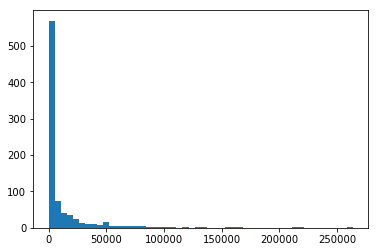

count       855.000000
mean      11782.973099
std       26124.835111
min           7.000000
25%         147.000000
50%        1318.000000
75%       10181.500000
max      263877.000000
Name: game_playtime, dtype: float64


1416

In [29]:
# Setting the right type of data and saving into a csv file 

df['steam_id'] = df['steam_id'].astype('int64')
df['steam_name'] = df['steam_name'].astype('str')
df['game_id'] = df['game_id'].astype('int')
df['game_name'] = df['game_name'].astype('str')
df['game_playtime'] = df['game_playtime'].astype('int')
df['game_2weeks'] = df['game_2weeks'].astype('int')

df.to_csv('steam_play.csv')

In [4]:
# If already made previous steps, getting the data from csv

df = pd.read_csv('steam_play.csv',encoding = "ISO-8859-1", index_col=0)

df['steam_id'] = df['steam_id'].astype('int64')
df['steam_name'] = df['steam_name'].astype('str')
df['game_id'] = df['game_id'].astype('int')
df['game_name'] = df['game_name'].astype('str')
df['game_playtime'] = df['game_playtime'].astype('int')
df['game_2weeks'] = df['game_2weeks'].astype('int')

df

,steam_id,steam_name,game_id,game_name,game_playtime,game_2weeks
0,76561197968553472,zort,10,Counter-Strike,0,0
1,76561197968553472,zort,20,Team Fortress Classic,0,0
2,76561197968553472,zort,30,Day of Defeat,0,0
3,76561197968553472,zort,40,Deathmatch Classic,0,0
4,76561197968553472,zort,50,Half-Life: Opposing Force,0,0
5,76561197968553472,zort,60,Ricochet,0,0
6,76561197968553472,zort,70,Half-Life,0,0
7,76561197968553472,zort,130,Half-Life: Blue Shift,0,0
8,76561197968553472,zort,220,Half-Life 2,0,0
9,76561197968553472,zort,240,Counter-Strike: Source,0,0


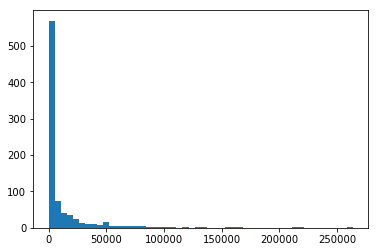

count       855.000000
mean      11782.973099
std       26124.835111
min           7.000000
25%         147.000000
50%        1318.000000
75%       10181.500000
max      263877.000000
Name: game_playtime, dtype: float64


1416

In [34]:
# Looking at playtime histogram from Team Fortress 2

tf = df[(df['game_name']=='Team Fortress 2') & (df['game_playtime']>0)]

plt.hist(tf['game_playtime'],50)
plt.show()

print(tf['game_playtime'].describe())

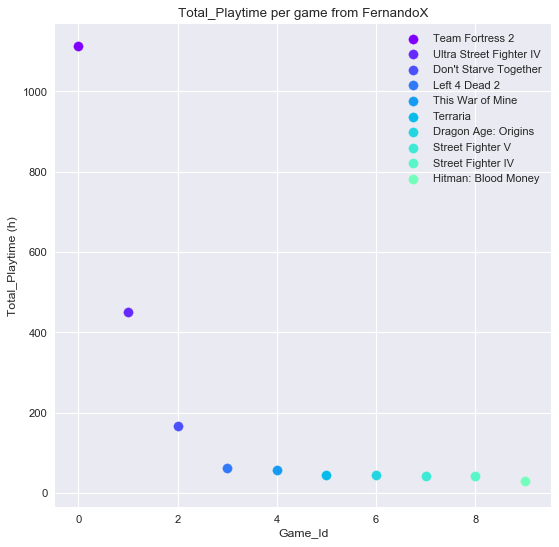

,steam_id,steam_name,game_id,game_name,game_playtime,game_2weeks
3214,76561198001976633,FernandoX,440,Team Fortress 2,66863,141
3094,76561198001976633,FernandoX,45760,Ultra Street Fighter IV,26969,0
3141,76561198001976633,FernandoX,322330,Don't Starve Together,9954,0
3020,76561198001976633,FernandoX,550,Left 4 Dead 2,3699,0
3195,76561198001976633,FernandoX,282070,This War of Mine,3440,0
3095,76561198001976633,FernandoX,105600,Terraria,2714,0
3019,76561198001976633,FernandoX,17450,Dragon Age: Origins,2594,0
3189,76561198001976633,FernandoX,310950,Street Fighter V,2540,0
2997,76561198001976633,FernandoX,21660,Street Fighter IV,2507,0
3038,76561198001976633,FernandoX,6860,Hitman: Blood Money,1818,0


In [89]:
# My top 10 games played

colors = cm.rainbow(np.linspace(0, 1, 20))
fernandox = df[df['steam_id']==76561198001976633].sort_values('game_playtime',ascending = False)

plt.figure(figsize=(8, 8), dpi=80)
for i in range (0,10):
    plt.scatter(i,fernandox.iloc[i]['game_playtime']/60, label=fernandox.iloc[i]['game_name'], c=colors[i], s=70)
ax = plt.gca()
ax.set_xlabel('Game_Id')
ax.set_ylabel('Total_Playtime (h)')
ax.set_title('Total_Playtime per game from FernandoX')    
plt.legend()
plt.show()

fernandox[0:10]

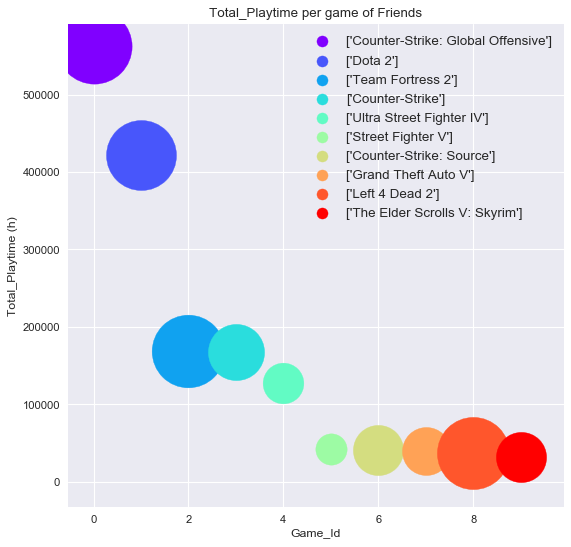

,total_playtime,game_name,total_players
game_id,,,
730,33797303.0,[Counter-Strike: Global Offensive],918
570,25291420.0,[Dota 2],795
440,10133488.0,[Team Fortress 2],857
10,10047398.0,[Counter-Strike],513
45760,7657073.0,[Ultra Street Fighter IV],269
310950,2556705.0,[Street Fighter V],159
240,2466611.0,[Counter-Strike: Source],410
271590,2378367.0,[Grand Theft Auto V],375
550,2199769.0,[Left 4 Dead 2],846


In [90]:
#The top 10 games played by friends and friends of friends

#gamegroup = df[df['game_playtime']> 0].groupby('game_id')
gamegroup = df.groupby('game_id')
colors = cm.rainbow(np.linspace(0, 1, 10))

col= ['total_playtime','game_name', 'total_players']
game_play = pd.DataFrame(columns = col)
                         
game_play['total_playtime'] = gamegroup.agg(sum)['game_playtime']
game_play['total_players'] = gamegroup.count()['game_playtime']
game_play['game_name'] = gamegroup['game_name'].unique()

game_play = game_play.sort_values('total_playtime', ascending = False)


fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

for i in range (0,10):
    ax.scatter(i,game_play.iloc[i]['total_playtime']/60, s=game_play.iloc[i]['total_players']*5, label=game_play.iloc[i]['game_name'], c=colors[i])

ax.set_xlabel('Game_Id')
ax.set_ylabel('Total_Playtime (h)')
ax.set_title('Total_Playtime per game of Friends')    


lgnd = ax.legend(scatterpoints=1, fontsize=12)
for i in range (0,10):
    lgnd.legendHandles[i]._sizes = [100]

plt.show()

game_play.head(10)

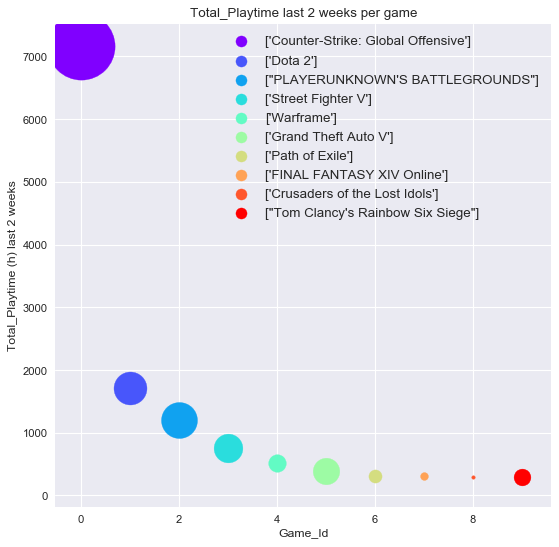

,total_playtime,game_name,total_players
game_id,,,
730,430344.0,[Counter-Strike: Global Offensive],366
570,102729.0,[Dota 2],88
578080,71732.0,[PLAYERUNKNOWN'S BATTLEGROUNDS],105
310950,45876.0,[Street Fighter V],67
230410,31201.0,[Warframe],25
271590,23552.0,[Grand Theft Auto V],57
238960,18971.0,[Path of Exile],14
39210,18501.0,[FINAL FANTASY XIV Online],5
402840,17683.0,[Crusaders of the Lost Idols],1


In [71]:
#The top 10 games played by friends and friends of friends for the last 2 weeks

gamegroup = df[df['game_2weeks']> 0].groupby('game_id')
#gamegroup = df.groupby('game_id')
colors = cm.rainbow(np.linspace(0, 1, 10))

col= ['total_playtime','game_name', 'total_players']
game_play = pd.DataFrame(columns = col)
                         
game_play['total_playtime'] = gamegroup.agg(sum)['game_2weeks']
game_play['total_players'] = gamegroup.count()['game_2weeks']
game_play['game_name'] = gamegroup['game_name'].unique()

game_play = game_play.sort_values('total_playtime', ascending = False)


fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

for i in range (0,10):
    ax.scatter(i,game_play.iloc[i]['total_playtime']/60, s=game_play.iloc[i]['total_players']*10, label=game_play.iloc[i]['game_name'], c=colors[i])

ax.set_xlabel('Game_Id')
ax.set_ylabel('Total_Playtime (h) last 2 weeks')
ax.set_title('Total_Playtime last 2 weeks per game')    


lgnd = ax.legend(scatterpoints=1, fontsize=12)
for i in range (0,10):
    lgnd.legendHandles[i]._sizes = [100]

plt.show()

game_play.head(100)

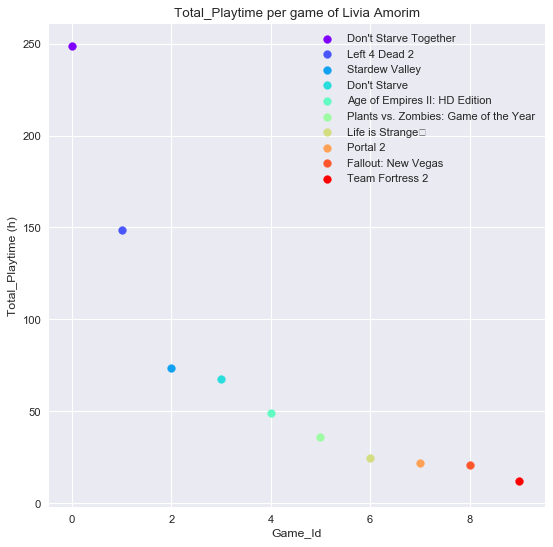

,steam_id,steam_name,game_id,game_name,game_playtime,game_2weeks
4068,76561198022223308,Livia Amorim,322330,Don't Starve Together,14939,0
4036,76561198022223308,Livia Amorim,550,Left 4 Dead 2,8928,0
4066,76561198022223308,Livia Amorim,413150,Stardew Valley,4413,0
4067,76561198022223308,Livia Amorim,219740,Don't Starve,4044,0
4062,76561198022223308,Livia Amorim,221380,Age of Empires II: HD Edition,2954,0
4035,76561198022223308,Livia Amorim,3590,Plants vs. Zombies: Game of the Year,2146,0
4064,76561198022223308,Livia Amorim,319630,Life is Strange,1488,0
4040,76561198022223308,Livia Amorim,620,Portal 2,1319,0
4060,76561198022223308,Livia Amorim,22380,Fallout: New Vegas,1244,0
4069,76561198022223308,Livia Amorim,440,Team Fortress 2,709,0


In [91]:
colors = cm.rainbow(np.linspace(0, 1, 10))
likamorim = df[df['steam_name']=='Livia Amorim'].sort_values('game_playtime',ascending = False)

plt.figure(figsize=(8, 8), dpi=80)
for i in range (0,10):
    plt.scatter(i,likamorim.iloc[i]['game_playtime']/60, label=likamorim.iloc[i]['game_name'], c=colors[i], s=100)
ax = plt.gca()
ax.set_xlabel('Game_Id')
ax.set_ylabel('Total_Playtime (h)')
ax.set_title('Total_Playtime per game of Livia Amorim')    
plt.legend()
plt.show()

likamorim[0:10]

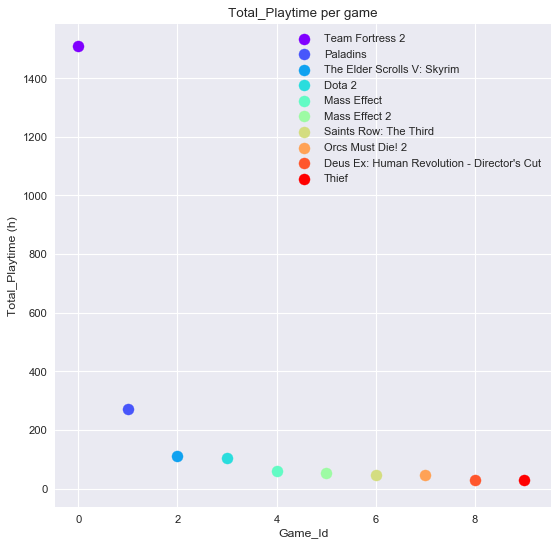

,steam_id,steam_name,game_id,game_name,game_playtime,game_2weeks
149661,76561198005455488,Mr Blank,440,Team Fortress 2,90653,0
149654,76561198005455488,Mr Blank,444090,Paladins,16361,1041
149550,76561198005455488,Mr Blank,72850,The Elder Scrolls V: Skyrim,6717,0
149662,76561198005455488,Mr Blank,570,Dota 2,6323,0
149503,76561198005455488,Mr Blank,17460,Mass Effect,3555,0
149513,76561198005455488,Mr Blank,24980,Mass Effect 2,3124,0
149600,76561198005455488,Mr Blank,55230,Saints Row: The Third,2794,0
149582,76561198005455488,Mr Blank,201790,Orcs Must Die! 2,2675,0
149642,76561198005455488,Mr Blank,238010,Deus Ex: Human Revolution - Director's Cut,1838,0
149624,76561198005455488,Mr Blank,239160,Thief,1779,0


In [84]:
colors = cm.rainbow(np.linspace(0, 1, 10))
matheus = df[df['steam_name']=='Mr Blank'].sort_values('game_playtime',ascending = False)

plt.figure(figsize=(8, 8), dpi=80)
for i in range (0,10):
    plt.scatter(i,matheus.iloc[i]['game_playtime']/60, label=matheus.iloc[i]['game_name'], c=colors[i], s=100)
ax = plt.gca()
ax.set_xlabel('Game_Id')
ax.set_ylabel('Total_Playtime (h)')
ax.set_title('Total_Playtime per game')    
plt.legend()
plt.show()


matheus[0:10]

In [85]:


def addUserGames(curuser):
    for curgame in curuser.games:        
        if hasattr(curgame, 'playtime_2weeks'):
            df.loc[len(df.index)] = [curuser.id,curuser.name,curgame.id,curgame.name,curgame.playtime_forever,curgame.playtime_2weeks]
        else:
            df.loc[len(df.index)] = [curuser.id,curuser.name,curgame.id,curgame.name,curgame.playtime_forever,0]

print(len(me.friends))
print(me.friends)

user = me.friends[306]


312
[<SteamUser "Dalek Caan" (76561197961575440)>, <SteamUser "clow" (76561197962771889)>, <SteamUser "jb" (76561197963034882)>, <SteamUser "Luiz Ventura" (76561197963385371)>, <SteamUser "DanMarques" (76561197964250864)>, <SteamUser "Borodon" (76561197965560134)>, <SteamUser "Mr.JoJo" (76561197966344719)>, <SteamUser "LexHorv" (76561197967318769)>, <SteamUser "Marsellus" (76561197967772289)>, <SteamUser "Valak" (76561197967848567)>, <SteamUser "Sonetti" (76561197967868288)>, <SteamUser "GABIRU" (76561197969608600)>, <SteamUser "aLucarde[T] @ Gamelyst" (76561197971023017)>, <SteamUser "Marcio Barrios" (76561197971419013)>, <SteamUser "Thiago" (76561197975598176)>, <SteamUser "JiraspioM" (76561197976042313)>, <SteamUser "Pvt. Awesome" (76561197978291867)>, <SteamUser "Jquerubim" (76561197980684294)>, <SteamUser "Kung Lol" (76561197980709735)>, <SteamUser "tripoco" (76561197980819376)>, <SteamUser "Bonatti" (76561197981314972)>, <SteamUser "JmY.KDashRLZ" (76561197982487603)>, <SteamUser 

In [55]:
bk = df.copy()

In [66]:
df[(df['game_name']=='Crusaders of the Lost Idols') & df['game_2weeks']>0]

,steam_id,steam_name,game_id,game_name,game_playtime,game_2weeks
131163,76561198047518432,Weeaboo,402840,Crusaders of the Lost Idols,18509,17683
